In [175]:
import requests
import ssl
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras.utils as np_utils
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context

In [176]:
import matplotlib.pyplot as plt
import matplotlib.image as img
def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2, 2)
    plt.imshow(image, cmap='binary')
    plt.show()

In [177]:
ds = tf.keras.datasets.mnist

In [178]:
#ds.load_data()
(x_train,y_train),(x_test,y_test)= ds.load_data()

In [179]:
#normalize x between 0 & 1
x_train_normalize = tf.keras.utils.normalize(x_train)
x_test_normalize = tf.keras.utils.normalize(x_test)

In [180]:
#one hot encoding
y_trainOneHot = np_utils.to_categorical(y_train)
y_testOneHot = np_utils.to_categorical(y_test)

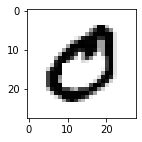

In [181]:
plot_image(x_train[21])

In [182]:
x_train[21]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  64, 253, 255,  63,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  96, 205, 251, 253, 205, 111,   4,   0,   0,   0,
          0,   0],
       [  

In [183]:
#Create CNN model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [184]:
model = Sequential()

#filter為16, Kernel size為(5,5),Padding為(same)
model.add(Conv2D(filters=16,
                 kernel_size=(5,5),
                 padding='same',
                 input_shape=(28,28,1), 
                 activation='relu'))

In [185]:
#MaxPooling size is (2,2)
model.add(MaxPooling2D(pool_size=(2,2)))

In [186]:
model.add(Conv2D(filters=36,
                 kernel_size=(5,5),
                 padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [187]:
#Drop掉部分神經元避免overfitting
model.add(Dropout(0.25))

In [188]:
#平坦化
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [189]:
#train model
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [190]:
'''
train_history=model.fit(x=x_train_normalize, 
                        y=y_trainOneHot,validation_split=0.2, 
                        epochs=20, batch_size=300,verbose=2)
'''

'\ntrain_history=model.fit(x=x_train_normalize, \n                        y=y_trainOneHot,validation_split=0.2, \n                        epochs=20, batch_size=300,verbose=2)\n'

In [191]:
#print(model.summary())


In [192]:
show_train_history('acc','val_acc')

NameError: name 'show_train_history' is not defined